In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Custom utilities for working with weather data
from utils_weather import outlier_stats, try_outlier_upd

In [3]:
df = pd.read_pickle("data/data-6.pkl")
df.shape

(145167, 19)

In [4]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145167 entries, 0 to 145459
Columns: 19 entries, Date to RainTomorrow
dtypes: datetime64[ns](1), float64(12), object(6)
memory usage: 65.6 MB


In [5]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [6]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No


In [7]:
df.isna().sum().sum()

0

In [8]:
outlier_stats(df)

std            iqr       
               count      %   count      %
MinTemp         26.0  0.018    82.0  0.056
MaxTemp        345.0  0.238   543.0  0.374
Rainfall         0.0  0.000     0.0  0.000
WindGustSpeed    0.0  0.000     0.0  0.000
WindSpeed9am     0.0  0.000     0.0  0.000
WindSpeed3pm     0.0  0.000     0.0  0.000
Humidity9am    472.0  0.325  1210.0  0.834
Humidity3pm      0.0  0.000     0.0  0.000
Pressure9am    790.0  0.544  2758.0  1.900
Pressure3pm    697.0  0.480  2346.0  1.616
Temp9am        163.0  0.112   307.0  0.211
Temp3pm        475.0  0.327   873.0  0.601

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,145167.0,12.184349,6.372589,-6.934410,7.7,11.9,16.8,31.303014
MaxTemp,145167.0,23.202630,7.086183,1.902004,18.0,22.6,28.2,44.497275
Rainfall,145167.0,0.382413,0.608991,0.000000,0.0,0.0,0.6,1.500000
WindGustSpeed,145167.0,39.369860,12.244540,8.500000,31.0,37.0,46.0,68.500000
WindSpeed9am,145167.0,13.901038,8.578344,0.000000,7.0,13.0,19.0,37.000000
WindSpeed3pm,145167.0,18.467837,8.485026,0.000000,13.0,17.0,24.0,40.500000
Humidity9am,145167.0,69.381338,19.221041,11.607329,57.0,70.0,84.0,100.000000
Humidity3pm,145167.0,51.552178,20.491832,0.000000,37.0,52.0,65.0,100.000000
Pressure9am,145167.0,1017.535849,6.694475,997.285533,1013.5,1016.6,1021.8,1037.760183
Pressure3pm,145167.0,1015.271403,6.626108,995.248751,1011.0,1015.3,1019.4,1035.272312


In [10]:
asymmetrics = df.skew()
is_asym = asymmetrics.abs() > 0.5

In [11]:
check_notas = asymmetrics[~is_asym]
check_notas

MinTemp         0.026079
MaxTemp         0.243364
WindSpeed3pm    0.426528
Humidity9am    -0.461392
Humidity3pm     0.032186
Pressure9am     0.021275
Pressure3pm     0.006321
Temp9am         0.092068
Temp3pm         0.269622
dtype: float64

In [12]:
check_as = asymmetrics[is_asym]
check_as

Rainfall         1.158557
WindGustSpeed    0.516789
WindSpeed9am     0.519929
dtype: float64

In [13]:
# Show graphics
def show_graphics(list_columns):
    for x_column in list_columns:
        x_skew = df[x_column].skew().round(4)
        print(f"\n\t{x_column} | Skew: {x_skew}\n")

        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,5),
                                          gridspec_kw={"height_ratios": (.2, .8)}
                                         )

        # assigning a graph to each ax
        sns.boxplot(data=df, x=x_column, ax=ax_box)
        sns.histplot(data=df, x=x_column, ax=ax_hist, bins=100)

        # remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()


	Rainfall | Skew: 1.1586



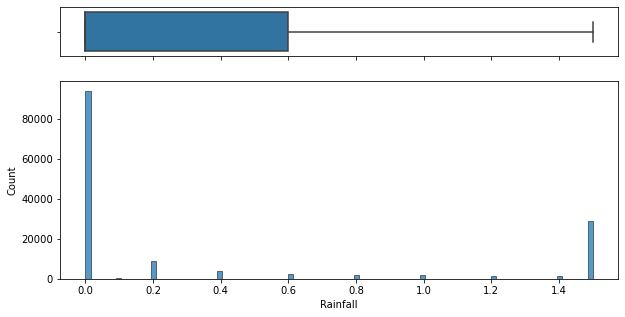


	WindGustSpeed | Skew: 0.5168



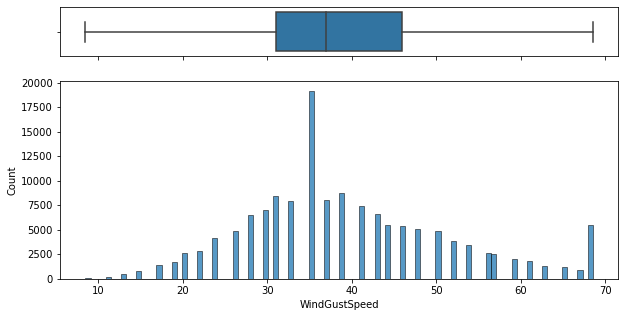


	WindSpeed9am | Skew: 0.5199



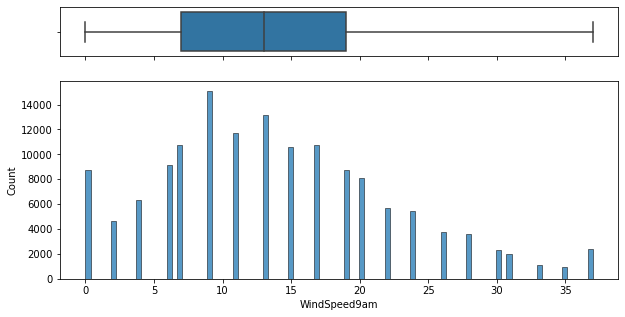

In [14]:
show_graphics(check_as.index)


	MinTemp | Skew: 0.0261



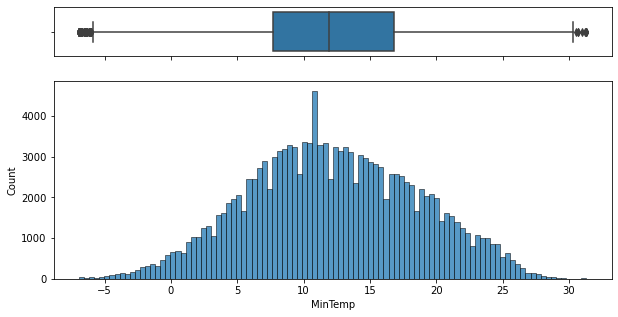


	MaxTemp | Skew: 0.2434



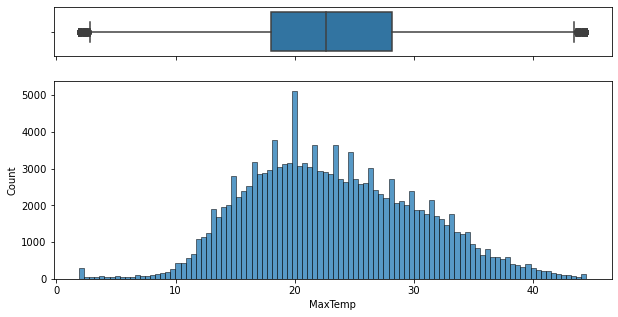


	WindSpeed3pm | Skew: 0.4265



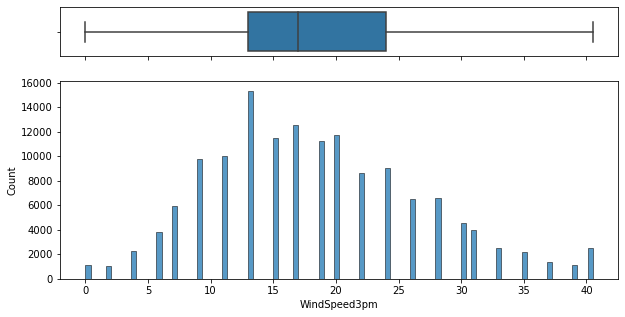


	Humidity9am | Skew: -0.4614



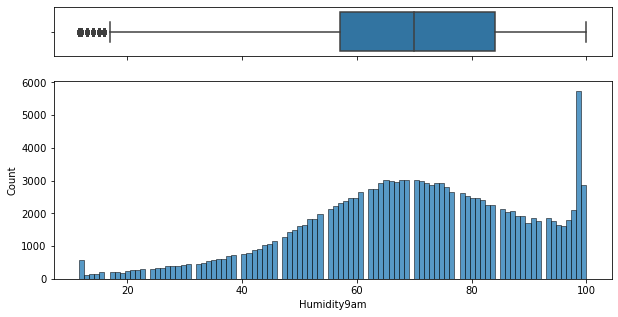


	Humidity3pm | Skew: 0.0322



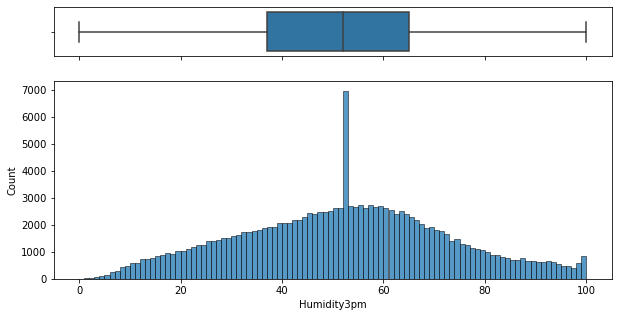


	Pressure9am | Skew: 0.0213



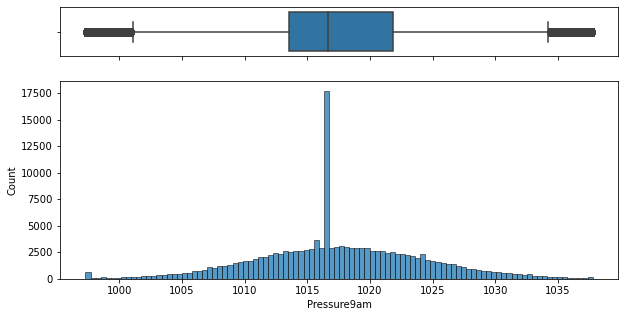


	Pressure3pm | Skew: 0.0063



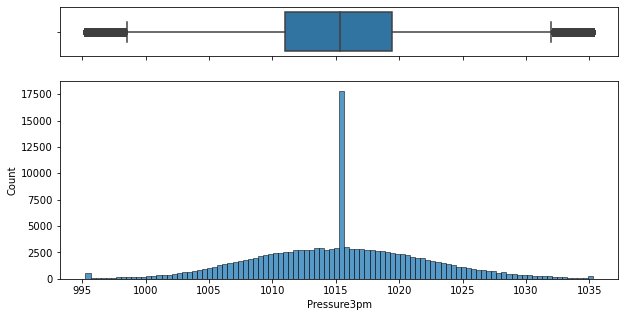


	Temp9am | Skew: 0.0921



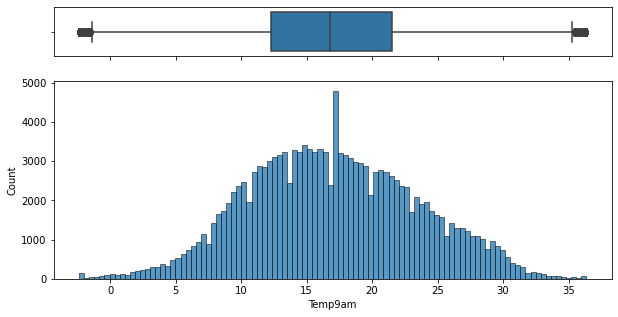


	Temp3pm | Skew: 0.2696



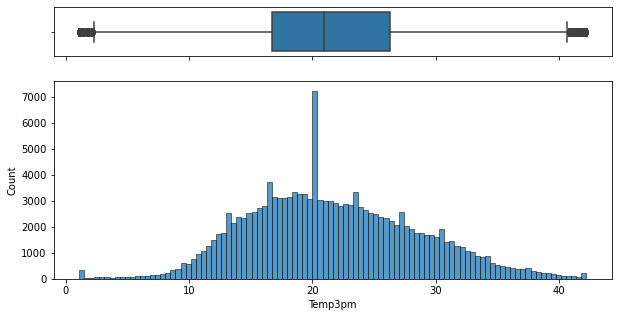

In [15]:
show_graphics(check_notas.index)